# Decision Trees
## Exercise 1 
Ternary classification

The following code creates a small dataset with two attributes and a target
variable with three possible values:

In [2]:
import pandas as pd
X = pd.DataFrame({'X1': [1, 1, 1, 1, 0, 0],
                  'X2': [1, 1, 1, 0, 0, 0]})
Y = pd.Series([1, 1, 2, 3, 2, 3])

1. Calculate the information gain for `X1` and `X2` relative to `Y`.
1. Based on these calculations, what attribute will be used for the first node of the ID3 tree?
1. Learn the entire tree and classify the instance `{'X1': 0, 'X2': 1}`.

## Exercise 2
ID3 as a "greedy" algorithm

The following code creates a dataset with features `A, B, C` and target variable `Y`:

1. Find the decision tree using ID3. Is it _consistent_ with the training data (does it have 100% accuracy)?
1. Is there a less deep decision tree consistent with the above data? If so, what logic concept does it represent?

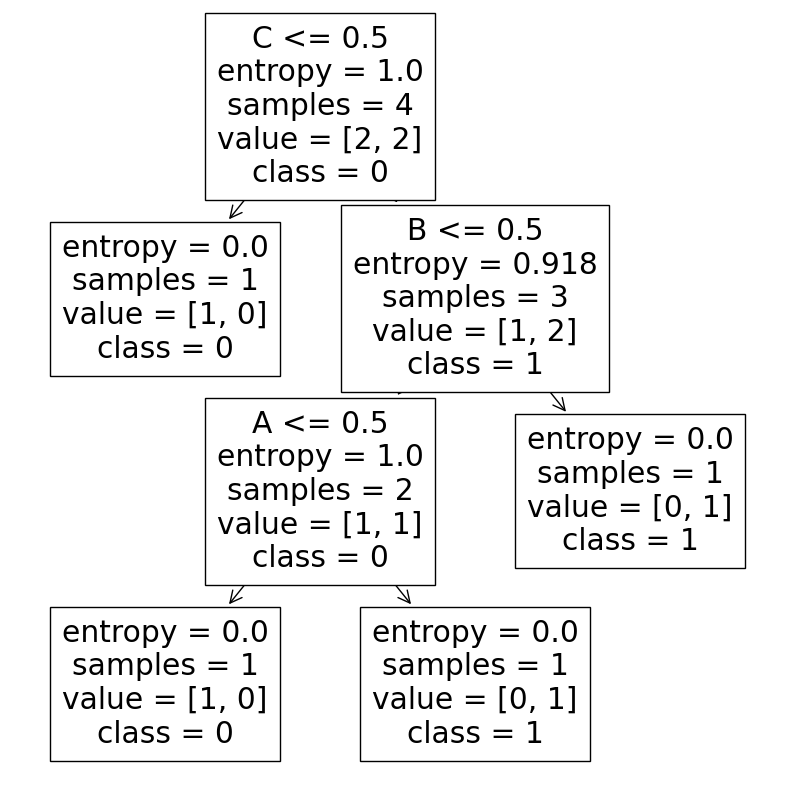

In [3]:
import pandas as pd
X = pd.DataFrame({'A': [1, 1, 0, 0],
                  'B': [1, 0, 1, 0],
                  'C': [0, 1, 1, 1]})
Y = pd.Series([0, 1, 1, 0])


from sklearn import tree
import matplotlib.pyplot as plt

dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, Y)

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['0', '1'])
plt.show()



## Exercise 3

Titanic dataset

The table bellow shows a few statistics on the survivors of the Titanic:

In [4]:
import pandas as pd
titanic = pd.DataFrame([
  ('Upper', 'Male', 'Child', 5, 5),
  ('Upper', 'Male', 'Adult', 175, 57),
  ('Upper', 'Female', 'Child', 1, 1),
  ('Upper', 'Female', 'Adult', 144, 140),
  ('Lower', 'Male', 'Child', 59, 24),
  ('Lower', 'Male', 'Adult', 1492, 281),
  ('Lower', 'Female', 'Child', 44, 27),
  ('Lower', 'Female', 'Adult', 281, 176)
],
columns=['Class', 'Gender', 'Age', 'Passengers', 'Survivors'])
titanic

,Class,Gender,Age,Passengers,Survivors
0,Upper,Male,Child,5,5
1,Upper,Male,Adult,175,57
2,Upper,Female,Child,1,1
3,Upper,Female,Adult,144,140
4,Lower,Male,Child,59,24
5,Lower,Male,Adult,1492,281
6,Lower,Female,Child,44,27
7,Lower,Female,Adult,281,176


1. We want to build a decision tree to predict the target variable `Y` (survived) based on variables `C` (class), `G` (gender) and `A` (age). Using information gain, determine which of the three variables will be used in the root node.
2. What is the training accuracy of the decision tree consisting only of the root node above?
3. If you were to build the full tree using all attributes, what would be the training accuracy? Note that you don’t have to actually build the full tree!

In [5]:
# 1. We want to build a decision tree to predict the target variable `Y` (survived) 
# based on variables `C` (class), `G` (gender) and `A` (age). 
# Using information gain, determine which of the three variables will be used in the root node.


# ig(Y, C) = H[1490-, 711+] - (325/2201 * H[122-, 203+] + 1876/2201 * H[1368-, 508+]) = 0.048501

# ig(Y, G) = H[1490-, 711+] - (470/2201 * H[126-, 344+] + 1731/2201 * H[1364-, 367+]) = 0.1423

# ig(Y, A) = H[1490-, 711+] - (109/2201 * H[52-, 57+] + 2092/2201 * H[1438-, 654+]) = 0.0064

# G is the best split


# 2. What is the training accuracy of the decision tree consisting only of the root node above?

# 470/2201 * 344/470 + 1731/2201 * 1364/1731 = 0.776

# 3. If you were to build the full tree using all attributes, what would be the training accuracy? Note that you don’t have to actually build the full tree!

# (5 + 118 + 1 + 140 + 35 + 1211 + 27 + 176) / 2201 = 0.778

## Exercise 4
Exoplanets, one-hot encoding

Given a dataset with data regarding 800 exoplanets, fit a decision tree to find how well `Size` and `Orbit` describe if a planet is habitable. In other words, find the training accuracy of a decision tree model that uses those two variables to predict `Habitable` and also print the resulting tree.

In [6]:
from tools.pd_helpers import apply_counts
exoplanets = pd.DataFrame([
  ('Big', 'Near', 'Yes', 20),
  ('Big', 'Far', 'Yes', 170),
  ('Small', 'Near', 'Yes', 139),
  ('Small', 'Far', 'Yes', 45),
  ('Big', 'Near', 'No', 130),
  ('Big', 'Far', 'No', 30),
  ('Small', 'Near', 'No', 11),
  ('Small', 'Far', 'No', 255)
],
columns=['Big', 'Orbit', 'Habitable', 'Count'])
exoplanets = apply_counts(exoplanets, 'Count')

exoplanets

,Big,Orbit,Habitable
0,Big,Near,Yes
1,Big,Near,Yes
2,Big,Near,Yes
3,Big,Near,Yes
4,Big,Near,Yes
...,...,...,...
795,Small,Far,No
796,Small,Far,No
797,Small,Far,No
798,Small,Far,No


/home/dragosel/Desktop/Education/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy:  0.8675


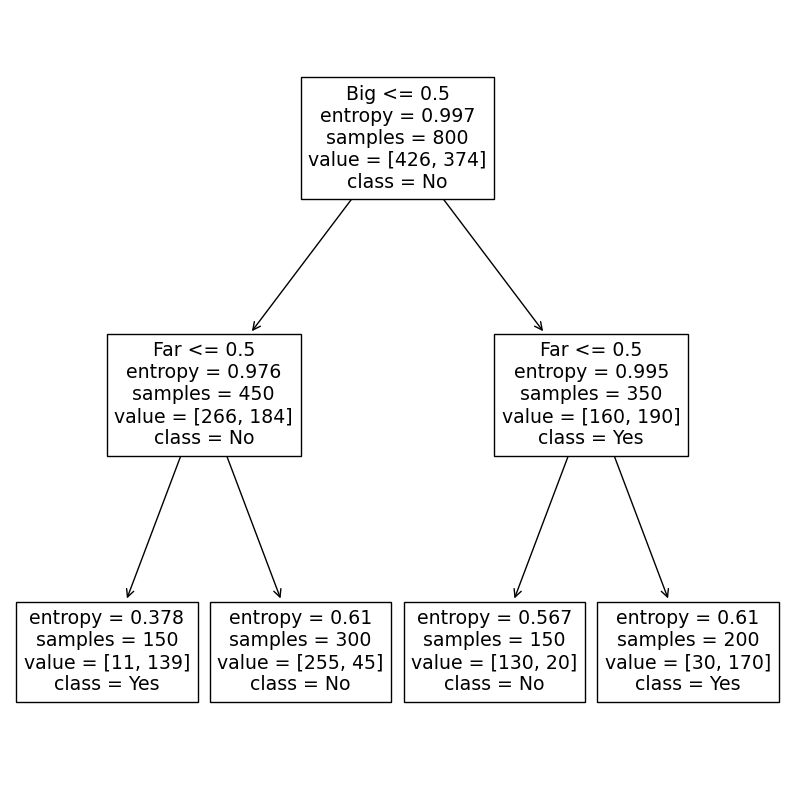

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt

d = exoplanets

enc = OneHotEncoder(sparse=False).fit(d)
cols = [i for sublist in enc.categories_ for i in sublist]
d = pd.DataFrame(enc.transform(d), columns=cols)

d = d.drop(columns=['Small', 'Near', 'No'])


X = d[['Big', 'Far']]
Y = d['Yes']

dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)
print("Accuracy: " , dt.score(X, Y))

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


## Exercise 5

Exoplanets, continuous variable

Given a dataset with 9 exoplanets for which we know the `Temperature` as well as the target variable `Habitable`.

1. Find the training accuracy of a decision tree that predicts `Habitable` using `Temperature` and print the resulting tree.
1. Independently calculate the split points that the algorithm will use for `Temperature` and check it against the generated tree. (The solution does not need to be general, can be "hard-coded" for this dataset.)
1. Independently calculate the entropy of the root node of the generated tree.

   Temperature  Habitable
0          205          0
1          205          0
2          260          1
3          380          1
4          205          0
5          260          1
6          260          1
7          380          0
8          380          0


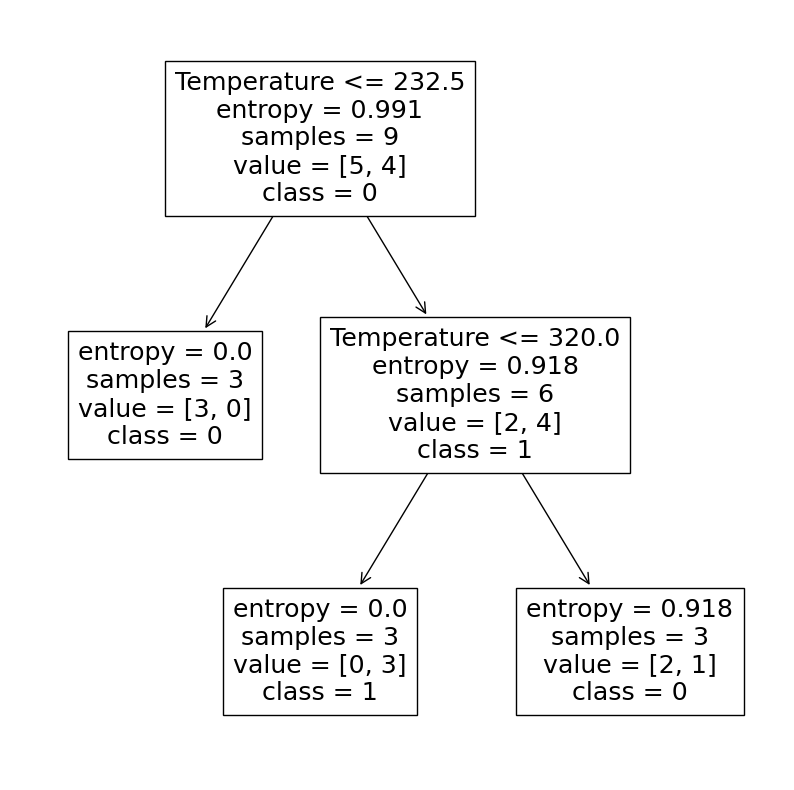

0.8888888888888888
[232.5, 320.0]


NameError: name 'entropy' is not defined